<a href="https://colab.research.google.com/github/namanpundir/tensorflowcatdog/blob/main/dogvscat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project-2
The task of this project is to use a deep neural network model to build a classifier that can classify images of different categories.

Dataset: Dogs VS Cat


Name: Naman Pundir

Email Id: namanpun@buffalo.edu

UB Person ID: 50373843


In [2]:
#importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
# importing libraries for Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation


In [4]:
test_dir="/content/drive/MyDrive/AI/proj2/dog vs cat/dataset/test_set"
train_dir="/content/drive/MyDrive/AI/proj2/dog vs cat/dataset/training_set"

train_dir_cats = train_dir + '/cats'
train_dir_dogs = train_dir + '/dogs'
test_dir_cats = test_dir + '/cats'
test_dir_dogs = test_dir + '/dogs'

In [5]:
print('number of cats training images - ',len(os.listdir(train_dir_cats)))
print('number of dogs training images - ',len(os.listdir(train_dir_dogs)))
print('number of cats testing images - ',len(os.listdir(test_dir_cats)))
print('number of dogs testing images - ',len(os.listdir(test_dir_dogs)))


number of cats training images -  4000
number of dogs training images -  4000
number of cats testing images -  1000
number of dogs testing images -  1000


In [6]:
data_generator = ImageDataGenerator(rescale = 1.0/255.0, zoom_range = 0.2)

In [7]:
batch_size = 32
training_data = data_generator.flow_from_directory(directory = train_dir,
                                                   target_size = (64, 64),
                                                   batch_size = batch_size,
                                                   class_mode = 'binary')
testing_data = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (64, 64),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
# preparing the layers in the Convolutional Deep Neural Network
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = training_data.image_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 126, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))
model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate = 0.15))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(units = len(set(training_data.classes)), activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 126)       7

In [ ]:
fitted_model = model.fit_generator(
    training_data,
    steps_per_epoch=training_data.samples//training_data.batch_size,
    epochs=25,
    validation_data=testing_data, validation_steps=testing_data.samples//testing_data.batch_size,
    verbose=1)

Epoch 1/25
250/250 [==============================] - 112s 447ms/step - loss: 0.2307 - accuracy: 0.8989 - val_loss: 0.4081 - val_accuracy: 0.8281
Epoch 2/25
250/250 [==============================] - 115s 461ms/step - loss: 0.2262 - accuracy: 0.9075 - val_loss: 0.4068 - val_accuracy: 0.8306
Epoch 3/25
250/250 [==============================] - 105s 419ms/step - loss: 0.2194 - accuracy: 0.9049 - val_loss: 0.4095 - val_accuracy: 0.8221
Epoch 4/25
250/250 [==============================] - 106s 425ms/step - loss: 0.2284 - accuracy: 0.9028 - val_loss: 0.4237 - val_accuracy: 0.8281
Epoch 5/25
250/250 [==============================] - 107s 430ms/step - loss: 0.2238 - accuracy: 0.9034 - val_loss: 0.4250 - val_accuracy: 0.8211
Epoch 6/25
250/250 [==============================] - 107s 426ms/step - loss: 0.2141 - accuracy: 0.9071 - val_loss: 0.5219 - val_accuracy: 0.8070
Epoch 7/25
250/250 [==============================] - 108s 433ms/step - loss: 0.2201 - accuracy: 0.9049 - val_loss: 0.4395 -

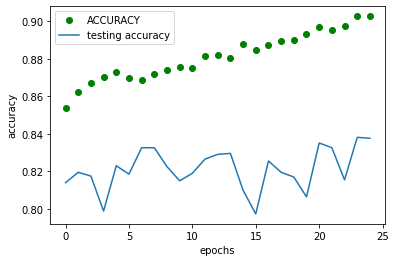

In [14]:
import matplotlib.pyplot as plt
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'go', label = 'ACCURACY')
plt.plot(fitted_model.history['val_accuracy'], label='testing accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

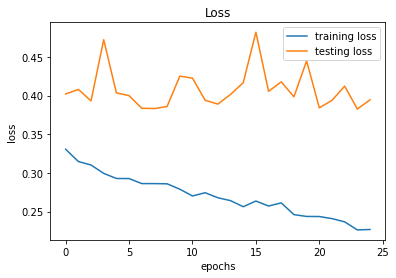

In [15]:
plt.plot(fitted_model.history['loss'], label='training loss')
plt.plot(fitted_model.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()